# Wisconsin Breast Cancer Dataset - Classification

### Data Characteristics

- **Predictor variables**
    * code
    * clump-thickness
    * cell-size
    * cell-shape
    * adhesion
    * single-cell-size
    * bare-nuclei
    * chromatin
    * nucleoli
    * mitoses


- **Two classes**
    * malignant
    * benign
    
- **699 total observations/samples/instances**

- **No null values**

## Breast Cancer Images

<figure>
  <p><img src="images-of-layers-of-glass-with-smears-of-breast-mass.png"
          width="600" height="auto" alt="Images of layers of glass with smears of breast mass"></p>
</figure>

In [1]:
# import requisite libraries

import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
# from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

/Users/Finch/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load Wisconsin Breast Cancer dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['code', 'clump-thickness', 'cell-size', 'cell-shape', 'adhesion', 'single-cell-size', 'bare-nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class']
dataset = pandas.read_csv(url, names=names)


In [3]:
# explore data: shape/dimensions
print(dataset.shape)

(699, 11)


In [4]:
# look at the first ten instances of the training data
print(dataset.head(10))

      code  clump-thickness  cell-size  cell-shape  adhesion  \
0  1000025                5          1           1         1   
1  1002945                5          4           4         5   
2  1015425                3          1           1         1   
3  1016277                6          8           8         1   
4  1017023                4          1           1         3   
5  1017122                8         10          10         8   
6  1018099                1          1           1         1   
7  1018561                2          1           2         1   
8  1033078                2          1           1         1   
9  1033078                4          2           1         1   

   single-cell-size bare-nuclei  chromatin  nucleoli  mitoses  class  
0                 2           1          3         1        1      2  
1                 7          10          3         2        1      2  
2                 2           2          3         1        1      2  
3          

In [5]:
# data types of variables
print(dataset.dtypes)

code                 int64
clump-thickness      int64
cell-size            int64
cell-shape           int64
adhesion             int64
single-cell-size     int64
bare-nuclei         object
chromatin            int64
nucleoli             int64
mitoses              int64
class                int64
dtype: object


In [6]:
# descriptive statistics of the dataset
print(dataset.describe())

               code  clump-thickness   cell-size  cell-shape    adhesion  \
count  6.990000e+02       699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06         4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05         2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04         1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05         2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06         4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06         6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07        10.000000   10.000000   10.000000   10.000000   

       single-cell-size   chromatin    nucleoli     mitoses       class  
count        699.000000  699.000000  699.000000  699.000000  699.000000  
mean           3.216023    3.437768    2.866953    1.589413    2.689557  
std            2.214300    2.438364    3.053634    1.715078    0.951273  
min            1.00

In [7]:
# class distribution -- class names and instances per class
print(dataset.groupby('class').size())

class
2    458
4    241
dtype: int64


## Data cleaning 

We will drop the *code* attribute, mark ? value for bare-nuclei with NaN (not a number), convert all attributes to type float

In [8]:
# data cleaning - delete code attribute
dataset.drop('code', axis=1, inplace=True)
print(dataset.shape)

(699, 10)


In [9]:
# data cleaning - mark ? value for bare-nuclei with NaN (not a number)
dataset[['bare-nuclei']] = dataset[['bare-nuclei']].replace('?', numpy.NaN)

In [10]:
# drop rows that has NaN vlaue
dataset.dropna(axis=0, how='any', inplace=True)

In [11]:
# now check shape/dimensions
print(dataset.shape)

(683, 10)


In [12]:
# convert all attributes to type float
dataset = dataset.astype(float)

In [13]:
# look at the first ten instances of the training data
print(dataset.head(10))

   clump-thickness  cell-size  cell-shape  adhesion  single-cell-size  \
0              5.0        1.0         1.0       1.0               2.0   
1              5.0        4.0         4.0       5.0               7.0   
2              3.0        1.0         1.0       1.0               2.0   
3              6.0        8.0         8.0       1.0               3.0   
4              4.0        1.0         1.0       3.0               2.0   
5              8.0       10.0        10.0       8.0               7.0   
6              1.0        1.0         1.0       1.0               2.0   
7              2.0        1.0         2.0       1.0               2.0   
8              2.0        1.0         1.0       1.0               2.0   
9              4.0        2.0         1.0       1.0               2.0   

   bare-nuclei  chromatin  nucleoli  mitoses  class  
0          1.0        3.0       1.0      1.0    2.0  
1         10.0        3.0       2.0      1.0    2.0  
2          2.0        3.0       1.

In [14]:
# data types of variables
print(dataset.dtypes)

clump-thickness     float64
cell-size           float64
cell-shape          float64
adhesion            float64
single-cell-size    float64
bare-nuclei         float64
chromatin           float64
nucleoli            float64
mitoses             float64
class               float64
dtype: object


In [15]:
# class distribution -- class names and instances per class
print(dataset.groupby('class').size())

class
2.0    444
4.0    239
dtype: int64


In [16]:
# set panda options
pandas.set_option('precision', 3)
pandas.set_option('display.width', 200)

In [17]:
# descriptive statistics of the dataset
print(dataset.describe())

       clump-thickness  cell-size  cell-shape  adhesion  single-cell-size  bare-nuclei  chromatin  nucleoli  mitoses    class
count          683.000    683.000     683.000   683.000           683.000      683.000    683.000   683.000  683.000  683.000
mean             4.442      3.151       3.215     2.830             3.234        3.545      3.445     2.870    1.603    2.700
std              2.821      3.065       2.989     2.865             2.223        3.644      2.450     3.053    1.733    0.955
min              1.000      1.000       1.000     1.000             1.000        1.000      1.000     1.000    1.000    2.000
25%              2.000      1.000       1.000     1.000             2.000        1.000      2.000     1.000    1.000    2.000
50%              4.000      1.000       1.000     1.000             2.000        1.000      3.000     1.000    1.000    2.000
75%              6.000      5.000       5.000     4.000             4.000        6.000      5.000     4.000    1.000  

In [18]:
# correlation
print(dataset.corr(method='pearson'))

                  clump-thickness  cell-size  cell-shape  adhesion  single-cell-size  bare-nuclei  chromatin  nucleoli  mitoses  class
clump-thickness             1.000      0.642       0.653     0.488             0.524        0.593      0.554     0.534    0.351  0.715
cell-size                   0.642      1.000       0.907     0.707             0.754        0.692      0.756     0.719    0.461  0.821
cell-shape                  0.653      0.907       1.000     0.686             0.722        0.714      0.735     0.718    0.441  0.822
adhesion                    0.488      0.707       0.686     1.000             0.595        0.671      0.669     0.603    0.419  0.706
single-cell-size            0.524      0.754       0.722     0.595             1.000        0.586      0.618     0.629    0.481  0.691
bare-nuclei                 0.593      0.692       0.714     0.671             0.586        1.000      0.681     0.584    0.339  0.823
chromatin                   0.554      0.756       0.73

## Visualize data

- Scatter plot matrix

- Histograms

- Box and whisker plots

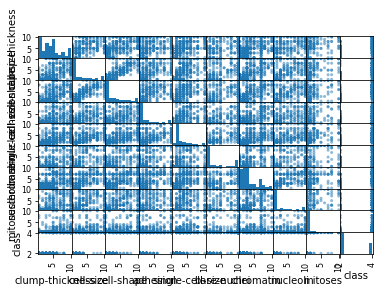

In [19]:
# data visualization - scatter plot matrix
scatter_matrix(dataset)
plt.show()

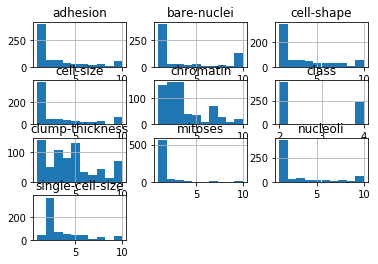

In [20]:
# data visualization - histograms
dataset.hist()
plt.show()

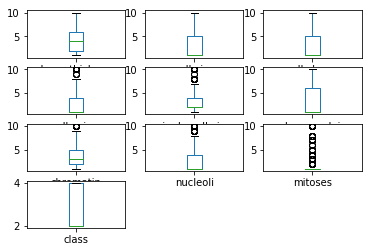

In [21]:
# data visualization - box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()

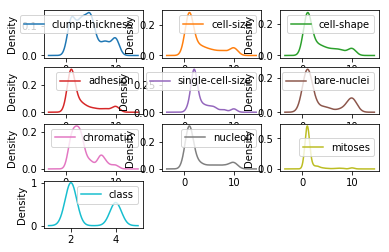

In [22]:
# density of attributes
dataset.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

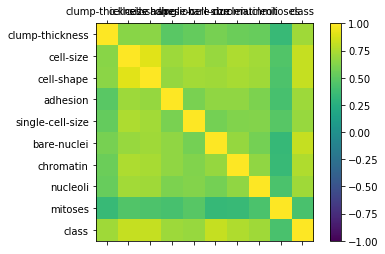

In [23]:
# visualize correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names[1:11])
ax.set_yticklabels(names[1:11])
plt.show()

## Divide training data into training and validation sets

- 80% for traing
- 20% for validation


In [24]:
array = dataset.values

# predictor variables
X = array[:,0:9]

# response variable
Y = array[:,9]

# validataion test dataset size = 20% of training data
validation_size = 0.20

# for reproduciablity of results, set seed
seed = 7

# split training data into training (80%) and validation sets (20%)
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Set cross-validation options and scoring metric

- Number of folds for cross-validation = 10
- Number oof instances for training = 80% of training data

In [25]:
# number of cross-validation folds
num_folds = 10

# number of instances for training the model
num_instances = len(X_train)

In [26]:
# set scoring metric for comparing performance of different models
scoring = 'accuracy'

## Specify classification algorithms

We will use classification accuracy metric to compare the performance of the following classifcation algorithms:
    
    - Logistic Regression (LR)

    - Linear Discriminant Analysis (LDA)
    
    - Gaussian Naive Bayes (NB)
    
    - K-Nearest Neighbors (kNN)
    
    - Decision Tree Classifier (CART)
    
    - Support Vector Machine (SVM)

In [27]:
# specify classification algorithms for comparision of relative performance
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

## Evaluate models one at a time

- Capture performance results into an array

In [28]:
# evaluate one model at a time on the training data
results = []
model_names = []
for name, model in models:
   kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
   cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   model_names.append(name)
   msg = "%s: %f - std: %f" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.970707 - std: 0.014733
LDA: 0.959731 - std: 0.016025
NB: 0.957710 - std: 0.026391
kNN: 0.978013 - std: 0.016122
CART: 0.941246 - std: 0.023269
SVM: 0.959562 - std: 0.023260


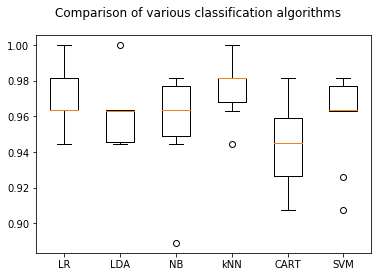

In [29]:
# compare performance of classification algorithms on the training data
fig = plt.figure()
fig.suptitle('Comparison of various classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

In [30]:
# standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('kNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))


In [31]:
# evaluate one model at a time on the standardized training data
results = []
model_names = []
for name, model in pipelines:
   kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
   cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(model_names)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

ScaledLR: 0.968855 (0.016632)
ScaledLDA: 0.959731 (0.016025)
ScaledNB: 0.957710 (0.026391)
ScaledKNN: 0.963333 (0.021773)
ScaledCART: 0.944916 (0.023482)
ScaledSVM: 0.965051 (0.022724)


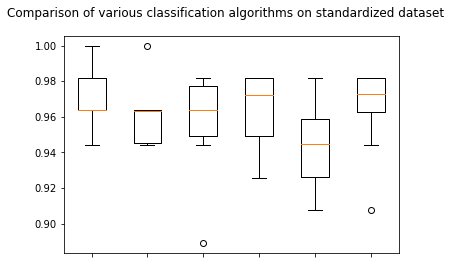

In [32]:
# compare performance of classification algorithms on the standardized training data
fig = plt.figure()
fig.suptitle('Comparison of various classification algorithms on standardized dataset')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

In [33]:
# normalize the dataset
pipelines = []
pipelines.append(('NormalizedLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('NormalizedLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('NormalizedNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('NormalizedKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('kNN', KNeighborsClassifier())])))
pipelines.append(('NormalizedCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('NormalizedSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVM', SVC())])))


In [34]:
# evaluate one model at a time on the normalized training data
results = []
model_names = []
for name, model in pipelines:
   kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
   cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   model_names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

NormalizedLR: 0.966970 (0.019984)
NormalizedLDA: 0.959731 (0.016025)
NormalizedNB: 0.957710 (0.026391)
NormalizedKNN: 0.978013 (0.016122)
NormalizedCART: 0.939360 (0.026452)
NormalizedSVM: 0.972458 (0.020751)


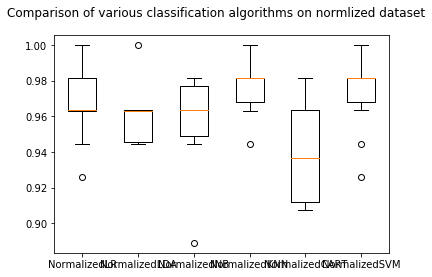

In [35]:
# compare performance of classification algorithms on the normalized training data
fig = plt.figure()
fig.suptitle('Comparison of various classification algorithms on normlized dataset')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

## Classification through Ensemble Methods

- Ada Boost
- Gradient Boosting
- Random Forest
- Extra Trees

In [36]:
# four ensembles for classification
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [37]:
# evaluate one ensemble model at a time
results = []
model_names = []
for name, model in ensembles:
   kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
   cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   model_names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

AB: 0.961448 (0.013110)
GBM: 0.961448 (0.019433)
RF: 0.963232 (0.022026)
ET: 0.957811 (0.026248)


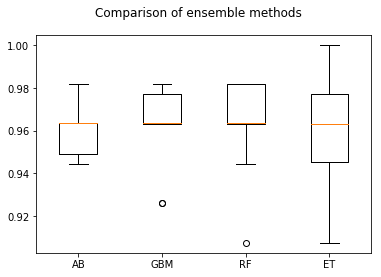

In [38]:
# compare the performance of ensemble methods
fig = plt.figure()
fig.suptitle('Comparison of ensemble methods')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()